## Seaborn 数据可视化基础

#### 介绍
https://huhuhang.com/post/machine-learning/seaborn-basic

Matplotlib 是支持 Python 语言的开源绘图库，因为其支持丰富的绘图类型、简单的绘图方式以及完善的接口文档，深受 Python 工程师、科研学者、数据工程师等各类人士的喜欢。Seaborn 是以 Matplotlib 为核心的高阶绘图库，无需经过复杂的自定义即可绘制出更加漂亮的图形，非常适合用于数据可视化探索。

#### 知识点

- 关联图
- 类别图
- 分布图
- 回归图
- 矩阵图
- 组合图

### Seaborn 介绍

Matplotlib 应该是基于 Python 语言最优秀的绘图库了，但是它也有一个十分令人头疼的问题，那就是太过于复杂了。3000 多页的官方文档，上千个方法以及数万个参数，属于典型的你可以用它做任何事，但又无从下手。尤其是，当你想通过 Matplotlib 调出非常漂亮的效果时，往往会伤透脑筋，非常麻烦。
Seaborn 基于 Matplotlib 核心库进行了更高阶的 API 封装，可以让你轻松地画出更漂亮的图形。Seaborn 的漂亮主要体现在配色更加舒服、以及图形元素的样式更加细腻，下面是 Seaborn 官方给出的参考图。

<img width='700px' src="https://doc.shiyanlou.com/document-uid214893labid3264timestamp1501118752821.png">

Seaborn 具有如下特点：
*  内置数个经过优化的样式效果。
*  增加调色板工具，可以很方便地为数据搭配颜色。
*  单变量和双变量分布绘图更为简单，可用于对数据子集相互比较。
*  对独立变量和相关变量进行回归拟合和可视化更加便捷。
*  对数据矩阵进行可视化，并使用聚类算法进行分析。
*  基于时间序列的绘制和统计功能，更加灵活的不确定度估计。
*  基于网格绘制出更加复杂的图像集合。

除此之外， Seaborn 对 Matplotlib 和 Pandas 的数据结构高度兼容 ，非常适合作为数据挖掘过程中的可视化工具。

### 快速优化图形

当我们使用 Matplotlib 绘图时，默认的图像样式算不上美观。此时，就可以使用 Seaborn 完成快速优化。下面，我们先使用 Matplotlib 绘制一张简单的图像。

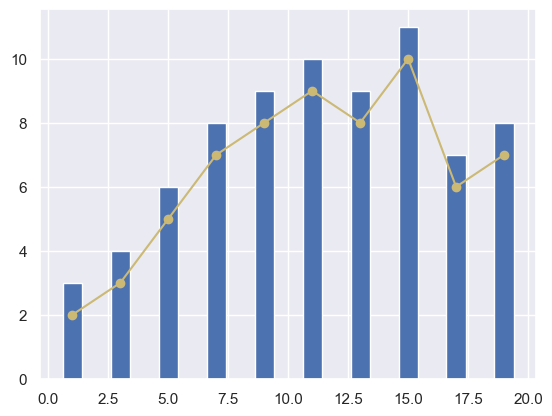

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
y_bar = [3, 4, 6, 8, 9, 10, 9, 11, 7, 8]
y_line = [2, 3, 5, 7, 8, 9, 8, 10, 6, 7]

plt.bar(x, y_bar)
plt.plot(x, y_line, '-o', color='y')

使用 Seaborn 完成图像快速优化的方法非常简单。只需要将 Seaborn 提供的样式声明代码 `sns.set()` 放置在绘图前即可。

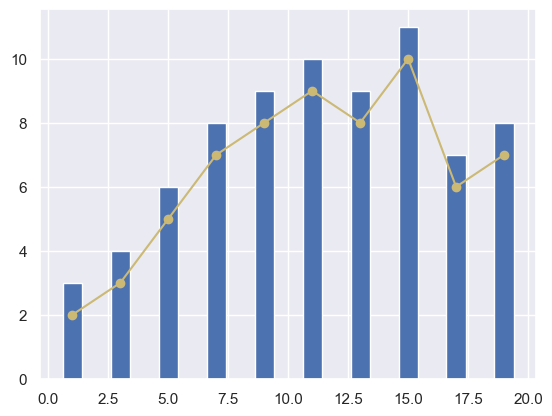

In [6]:
import seaborn as sns

sns.set()  # 声明使用 Seaborn 样式

plt.bar(x, y_bar)
plt.plot(x, y_line, '-o', color='y')

我们可以发现，相比于 Matplotlib 默认的纯白色背景，Seaborn 默认的浅灰色网格背景看起来的确要细腻舒适一些。而柱状图的色调、坐标轴的字体大小也都有一些变化。

`sns.set()` 的默认参数为：
```
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
```
其中：
- `context=''` 参数控制着默认的画幅大小，分别有 `{paper, notebook, talk, poster}` 四个值。其中，`poster > talk > notebook > paper`。
- `style=''` 参数控制默认样式，分别有 `{darkgrid, whitegrid, dark, white, ticks}`，你可以自行更改查看它们之间的不同。
- `palette=''` 参数为预设的调色板。分别有 `{deep, muted, bright, pastel, dark, colorblind}` 等，你可以自行更改查看它们之间的不同。
- 剩下的 `font=''` 用于设置字体，`font_scale=` 设置字体大小，`color_codes=` 不使用调色板而采用先前的 `'r'` 等色彩缩写。

### Seaborn 绘图 API

Seaborn 一共拥有 50 多个 API 类，相比于 Matplotlib 数千个的规模，可以算作是短小精悍了。其中，根据图形的适应场景，Seaborn 的绘图方法大致分类 6 类，分别是：关联图、类别图、分布图、回归图、矩阵图和组合图。而这 6 大类下面又包含不同数量的绘图函数。

接下来，我们就通过实际数据进行演示，使用 Seaborn 绘制不同适应场景的图形。

#### 关联图

当我们需要对数据进行关联性分析时，可能会用到 Seaborn 提供的以下几个 API。

| 关联性分析 | 介绍 |
|:-----------:|:----------------:|
| relplot | 绘制关系图 |
| scatterplot | 多维度分析散点图 |
| lineplot | 多维度分析线形图 |
[`relplot`](https://seaborn.pydata.org/generated/seaborn.relplot.html) 是 relational plots 的缩写，其可以用于呈现数据之后的关系，主要有散点图和条形图 2 种样式。本次实验，我们使用鸢尾花数据集进行绘图探索。
在绘图之前，先熟悉一下 iris 鸢尾花数据集。数据集总共 150 行，由 5 列组成。分别代表：萼片长度、萼片宽度、花瓣长度、花瓣宽度、花的类别。其中，前四列均为数值型数据，最后一列花的分类为三种，分别是：Iris Setosa、Iris Versicolour、Iris Virginica。

##### 散点图

In [7]:
iris = sns.load_dataset("iris")
iris.head()# 150行数据

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


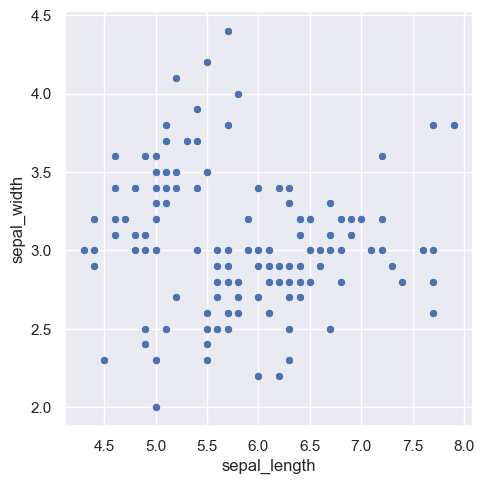

In [8]:
sns.relplot(x="sepal_length", y="sepal_width", data=iris)

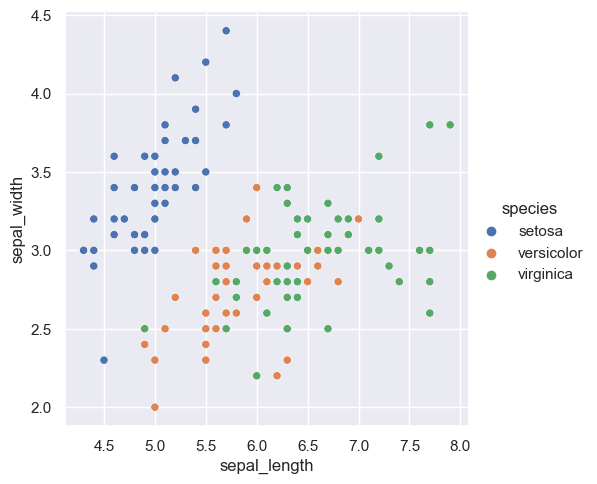

In [10]:
# 对不同类别进行颜色分类
sns.relplot(x="sepal_length", y="sepal_width",hue='species', data=iris)

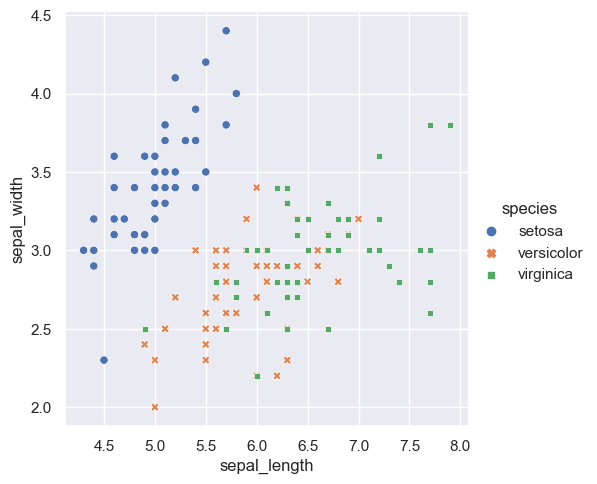

In [11]:
# 添加形状分类
sns.relplot(x="sepal_length", y="sepal_width",
            hue="species", style="species", data=iris)

##### 线型图

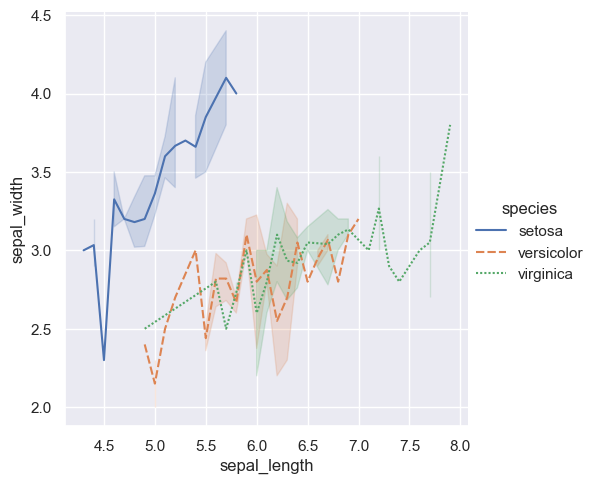

In [16]:
# 第一种
sns.relplot(x="sepal_length", y="sepal_width",
            hue="species", style="species",kind='line', data=iris)# 自动给出95置信区间

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

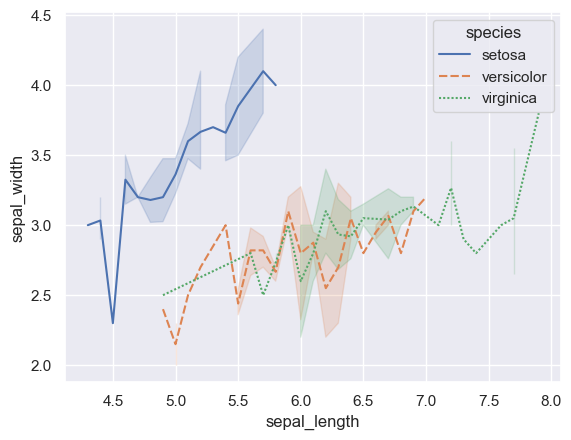

In [15]:
# 第二种 去掉第一种的kind参数
sns.lineplot(x='sepal_length',y='sepal_width',hue='species',style='species',data=iris)

#### 类别图

##### 散点图

<Axes: xlabel='sepal_length', ylabel='species'>

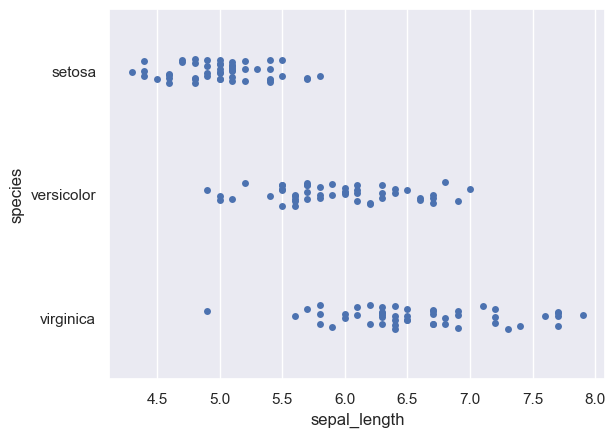

In [29]:
#默认为散点图 kind='strip'
sns.catplot(x="sepal_length", y="species", data=iris)
# sns.stripplot(x="sepal_length", y="species", data=iris)

<Axes: xlabel='sepal_length', ylabel='species'>

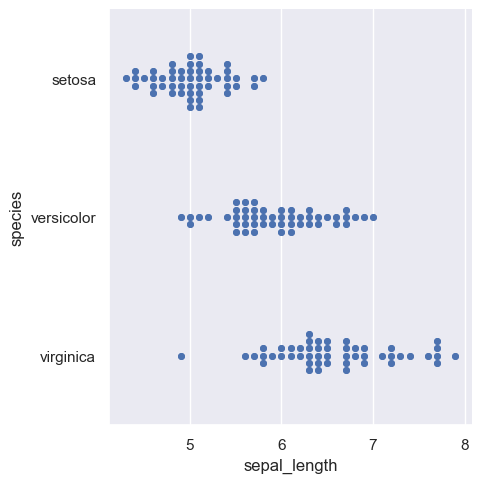

In [30]:
# 蜜蜂散点图（ beeswarm ）防止重叠
sns.catplot(x="sepal_length", y="species", kind="swarm", data=iris)
# sns.swarmplot(x="sepal_length", y="species", data=iris)

##### 箱线图

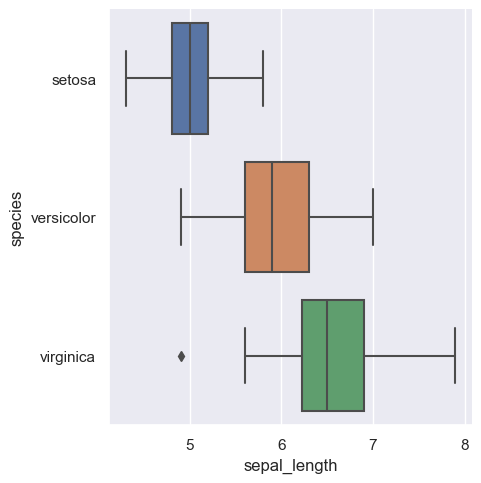

In [31]:
sns.catplot(x="sepal_length", y="species", kind="box", data=iris)
# sns.boxplot(x="sepal_length", y="species", data=iris)

##### 小提琴图

<Axes: xlabel='sepal_length', ylabel='species'>

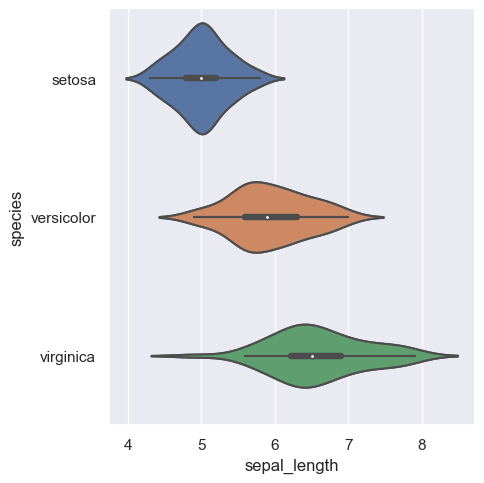

In [32]:
sns.catplot(x="sepal_length", y="species", kind="violin", data=iris)
# sns.violinplot(x="sepal_length", y="species", data=iris)

##### 增强箱线图

<Axes: xlabel='species', ylabel='sepal_length'>

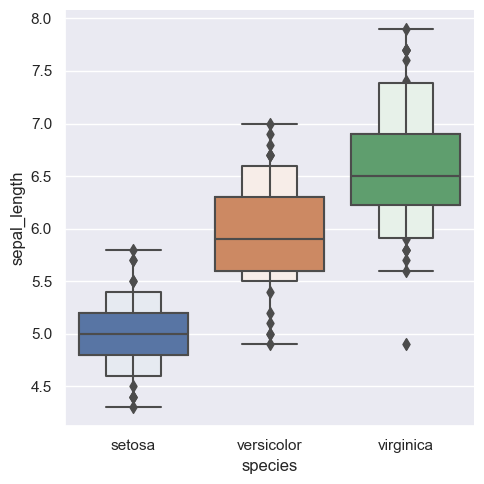

In [34]:
sns.catplot(x="species", y="sepal_length", kind="boxen", data=iris)
# sns.boxplot(x="species", y="sepal_length", data=iris)

##### 点线图

<Axes: xlabel='sepal_length', ylabel='species'>

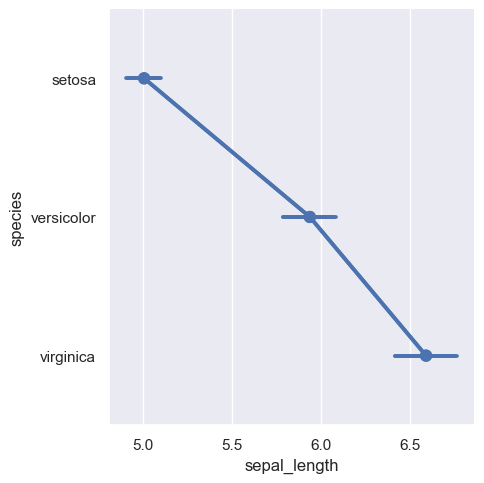

In [35]:
sns.catplot(x="sepal_length", y="species", kind="point", data=iris)
# sns.pointplot(x="sepal_length", y="species", data=iris)

##### 条形图

<Axes: xlabel='sepal_length', ylabel='species'>

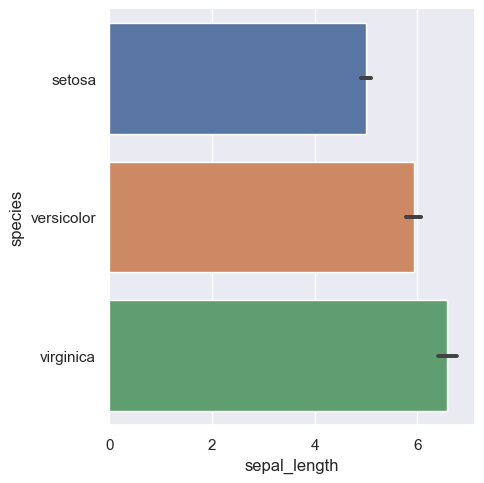

In [36]:
sns.catplot(x="sepal_length", y="species", kind="bar", data=iris)
# sns.barplot(x="sepal_length", y="species", data=iris)

##### 计数条形图

<Axes: xlabel='species', ylabel='count'>

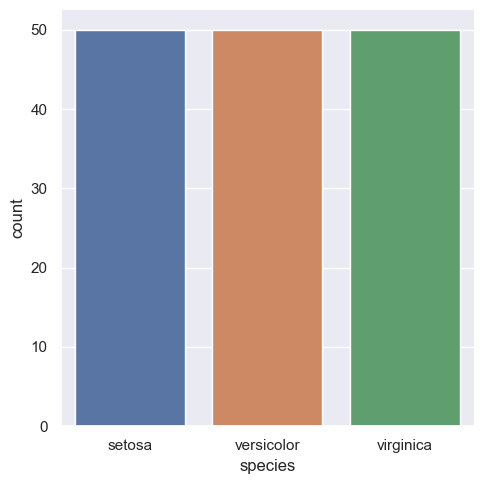

In [39]:
sns.catplot(x="species", kind="count", data=iris)
# sns.countplot(x="species", data=iris)

### 分布图

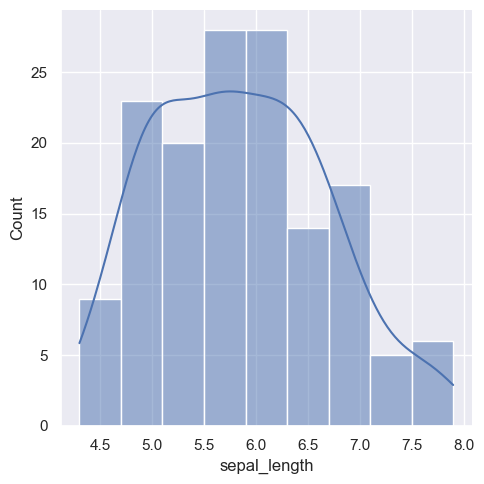

In [45]:
sns.displot(iris["sepal_length"],kde=True)

#### 核密度图

<Axes: xlabel='sepal_length', ylabel='Density'>

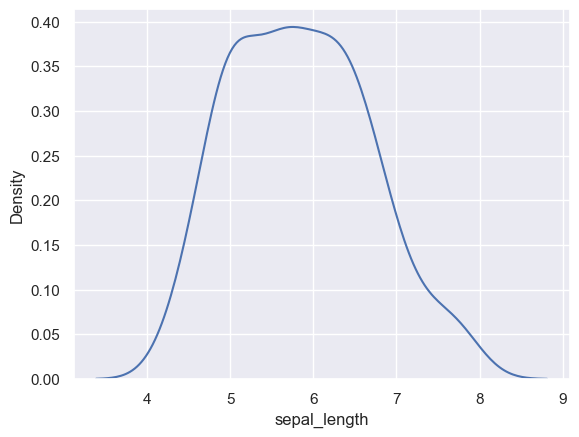

In [46]:
sns.kdeplot(iris["sepal_length"])

#### 二元变量分布图(jointplot)

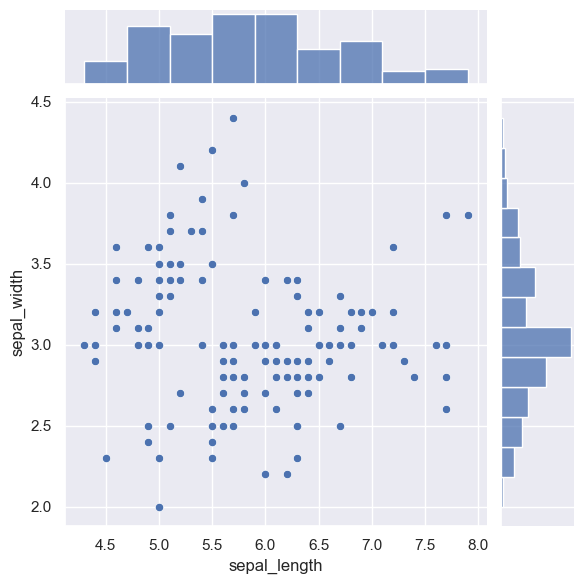

In [47]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)

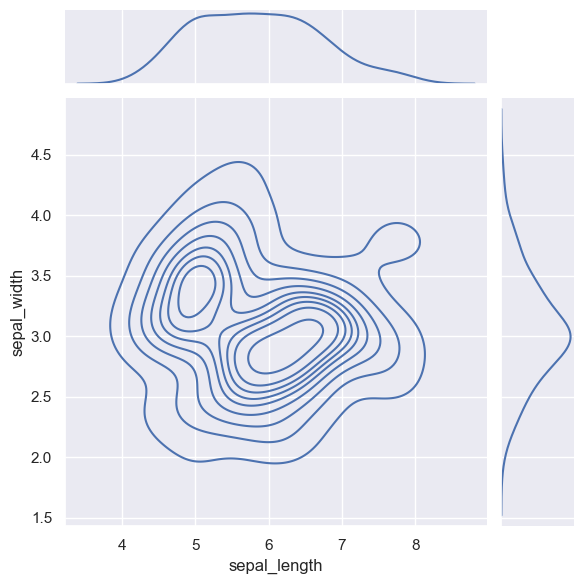

In [49]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris,kind='kde')

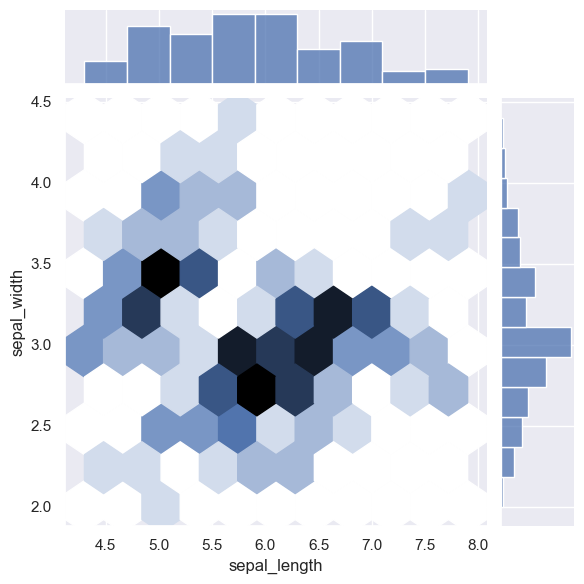

In [50]:
# 六边形计数图
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="hex")

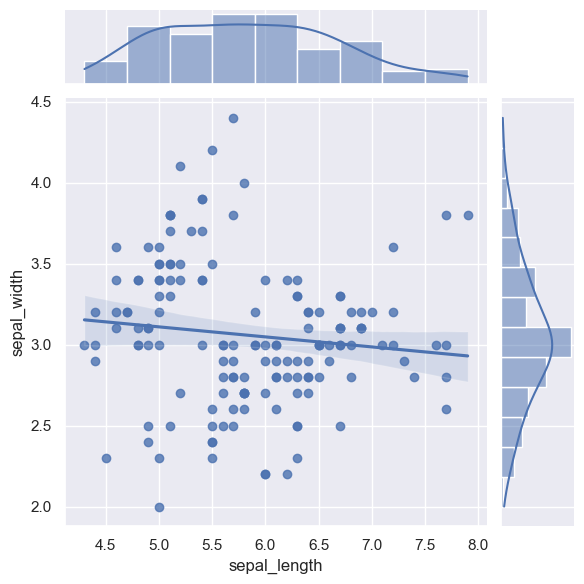

In [53]:
# 回归拟合图
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="reg")


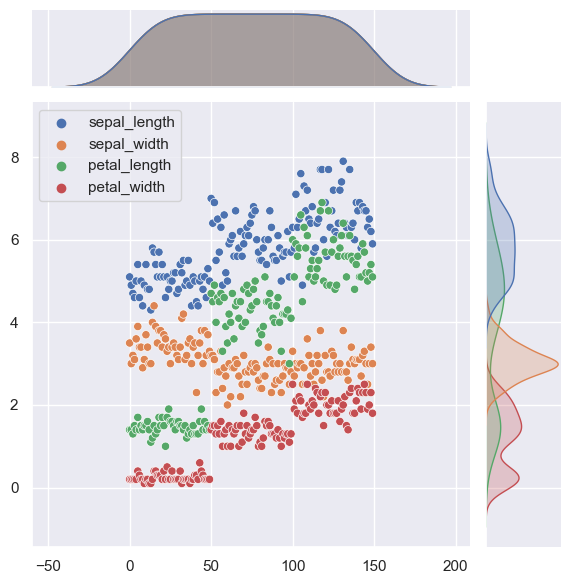

In [55]:
sns.jointplot(iris)

#### 所有特征变量两两分布图

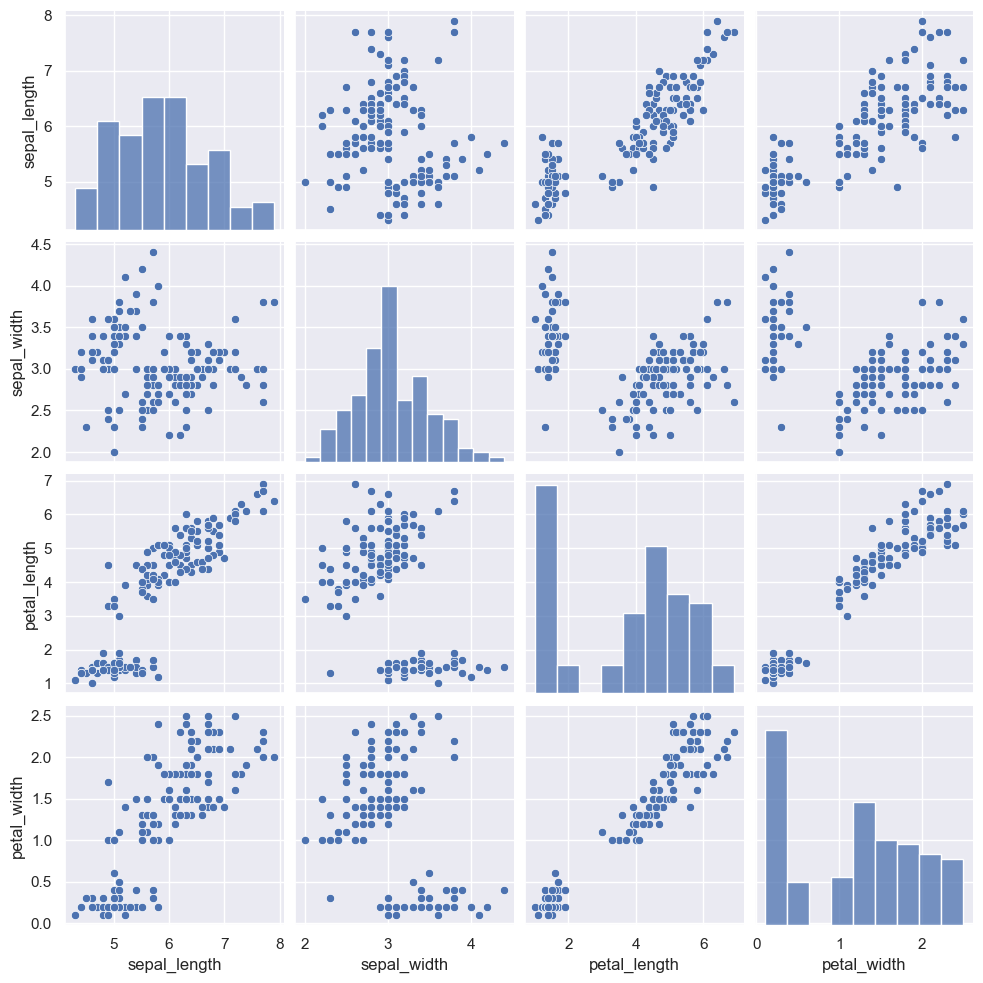

In [56]:
sns.pairplot(iris)# 中间为单变量分布图

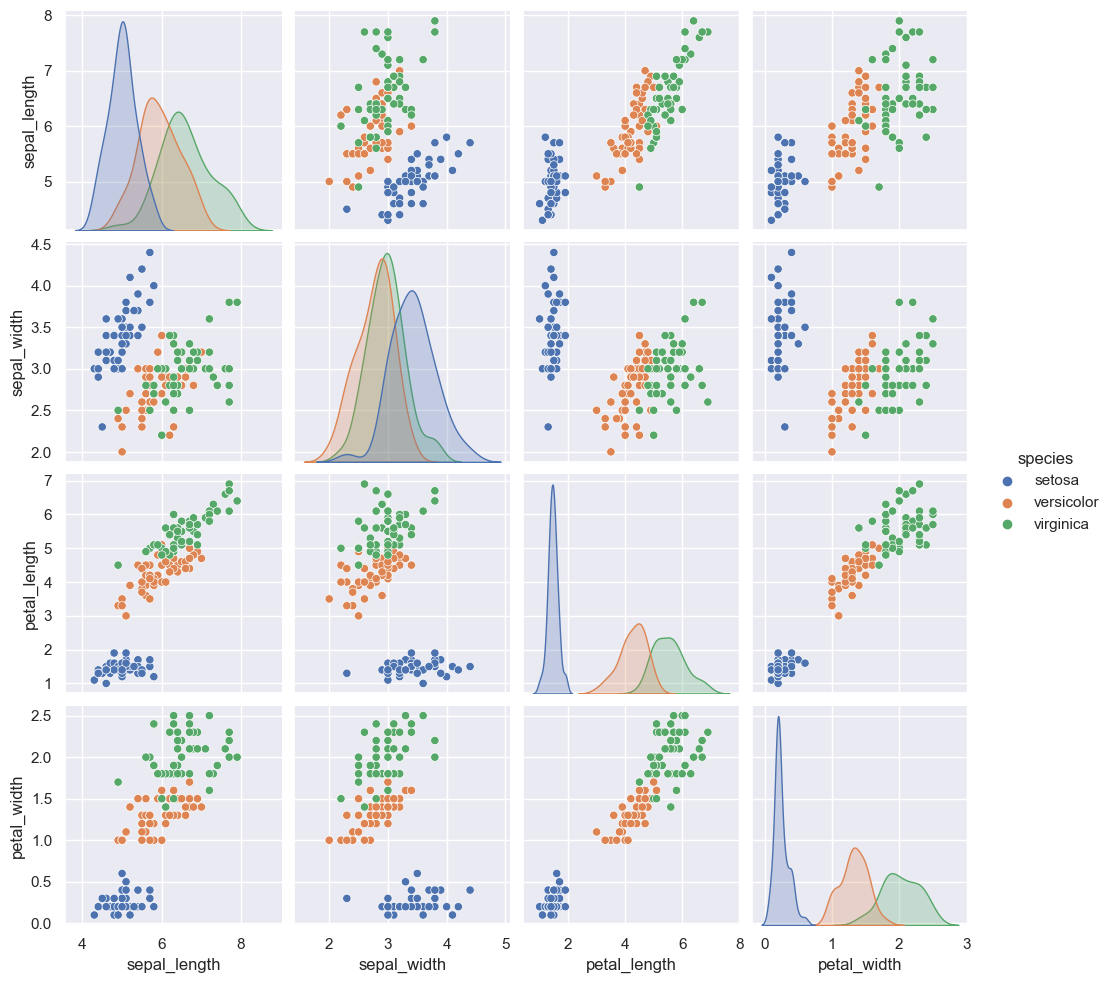

In [57]:
# 引入第三维度
sns.pairplot(iris,hue="species")

### 回归图

#### 单维度

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

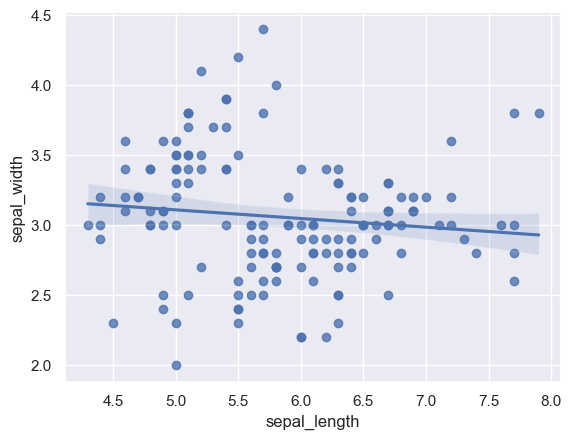

In [60]:
sns.regplot(x="sepal_length", y="sepal_width", data=iris)

#### 增加species维度

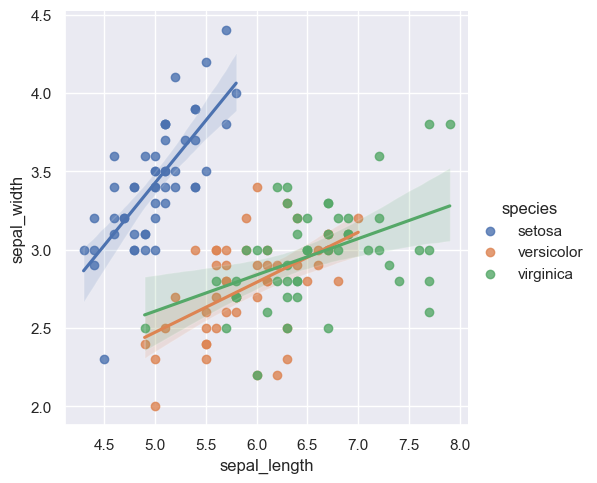

In [59]:
sns.lmplot(x="sepal_length", y="sepal_width", hue="species", data=iris)

### 矩阵图

#### 热力图

<Axes: >

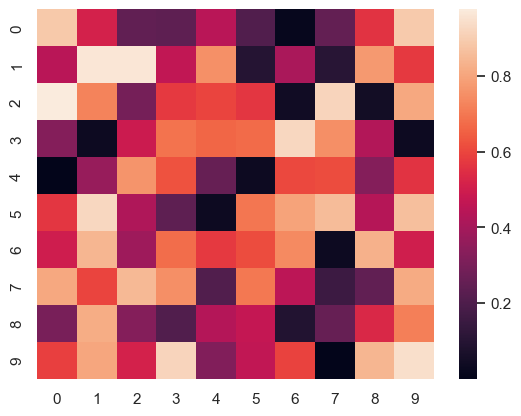

In [61]:
import numpy as np

sns.heatmap(np.random.rand(10, 10))

#### 层次聚类结构图

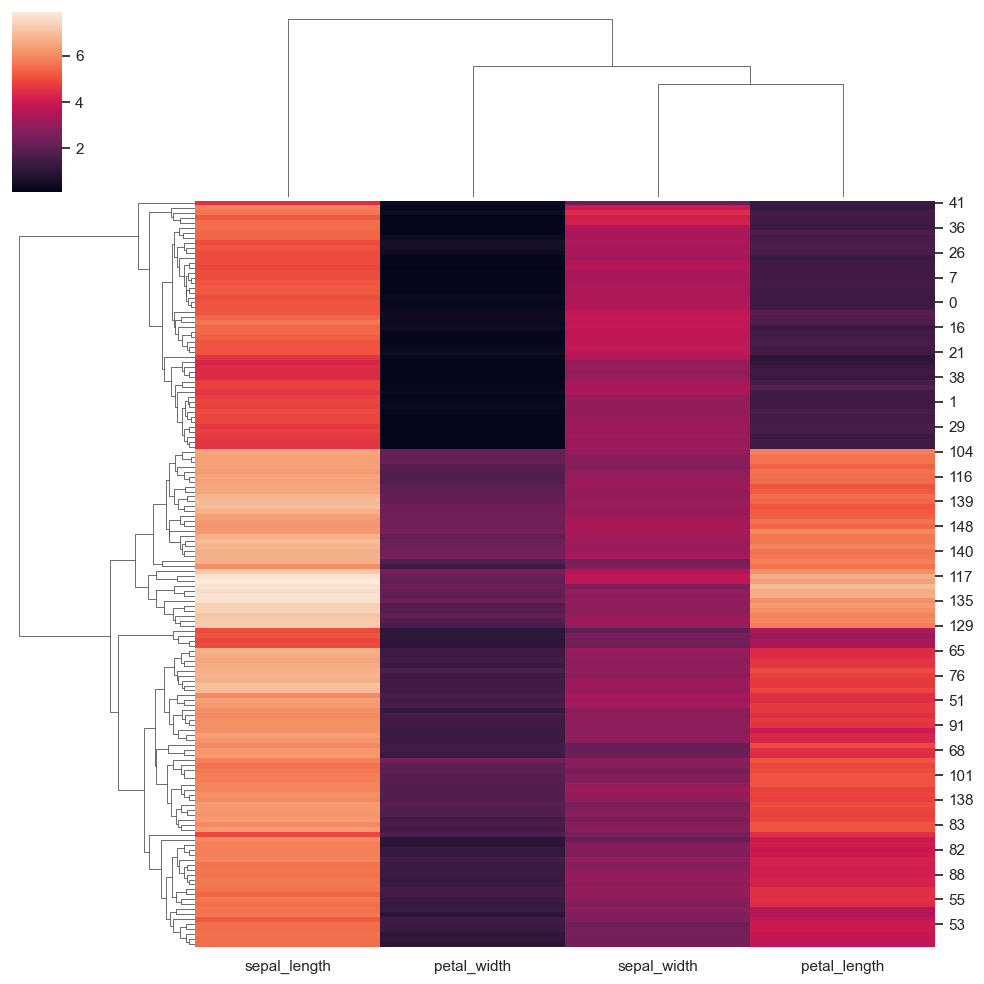

In [62]:
iris.pop("species")#去掉species这一列
sns.clustermap(iris)